In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy

In [ ]:
dataset = pd.read_csv('/content/weather.csv')
X = dataset.iloc[:,:].values
X

array([['Sunny', 'Hot', 'High', 'Weak', 'No'],
       ['Sunny', 'Hot', 'High', 'Strong', 'No'],
       ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'High', 'Weak', 'Yes'],
       ['Rain', 'Cool', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Cool', 'Normal', 'Strong', 'No'],
       ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
       ['Sunny', 'Mild', 'High', 'Weak', 'No'],
       ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'Normal', 'Weak', 'Yes'],
       ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
       ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
       ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
       ['Rain', 'Mild', 'High', 'Strong', 'No']], dtype=object)

In [ ]:
attribute = ['Outlook', 'Temp', 'Humidity', 'Wind']

In [ ]:
class Node(object):
    def __init__(self):
        self.value = None
        self.decision = None
        self.child = None

In [ ]:
def findEntropy(data, rows):
    yes=0
    no=0
    ans=-1
    idx=len(data[0])-1
    entropy=0

    for i in rows:
        if data[i][idx]=='Yes':
            yes=yes+1
        else:
            no=no+1

    x=yes/(yes+no)
    y=no/(yes+no)
    if x!=0 and y!=0:
        entropy= -1*(x*math.log2(x)+y*math.log2(y))
    if x==1:
        ans = 1
    if y==1:
        ans = 0
    return entropy, ans

In [ ]:
def findMaxGain(data, rows, columns):
    maxGain = 0
    retidx = -1
    entropy, ans = findEntropy(data, rows)
    if entropy == 0:
        """if ans == 1:
            print("Yes")
        else:
            print("No")"""
        return maxGain, retidx, ans
    for j in columns:
        mydict = {}
        idx = j
        for i in rows:
            key = data[i][idx]
            if key not in mydict:
                mydict[key] = 1
            else:
                mydict[key] = mydict[key] + 1
        gain = entropy

        # print(mydict)
        for key in mydict:
            yes = 0
            no = 0
            for k in rows:
                if data[k][j] == key:
                    if data[k][-1] == 'Yes':
                        yes = yes + 1
                    else:
                        no = no + 1
            # print(yes, no)
            x = yes/(yes+no)
            y = no/(yes+no)
            # print(x, y)
            if x != 0 and y != 0:
                gain += (mydict[key] * (x*math.log2(x) + y*math.log2(y)))/14
        # print(gain)
        if gain > maxGain:
            # print("hello")
            maxGain = gain
            retidx = j

    return maxGain, retidx, ans

In [ ]:
def buildTree(data, rows, columns):

    maxGain, idx, ans = findMaxGain(X, rows, columns)
    root = Node()
    root.childs = []
    # print(maxGain)

    if maxGain == 0:
        if ans == 1:
            root.value = 'Yes'
        else:
            root.value = 'No'
        return root

    root.value = attribute[idx]
    mydict = {}
    for i in rows:
        key = data[i][idx]
        if key not in mydict:
            mydict[key] = 1
        else:
            mydict[key] += 1

    newcolumns = copy.deepcopy(columns)
    newcolumns.remove(idx)
    for key in mydict:
        newrows = []
        for i in rows:
            if data[i][idx] == key:
                newrows.append(i)
        # print(newrows)
        temp = buildTree(data, newrows, newcolumns)
        temp.decision = key
        root.childs.append(temp)
    return root

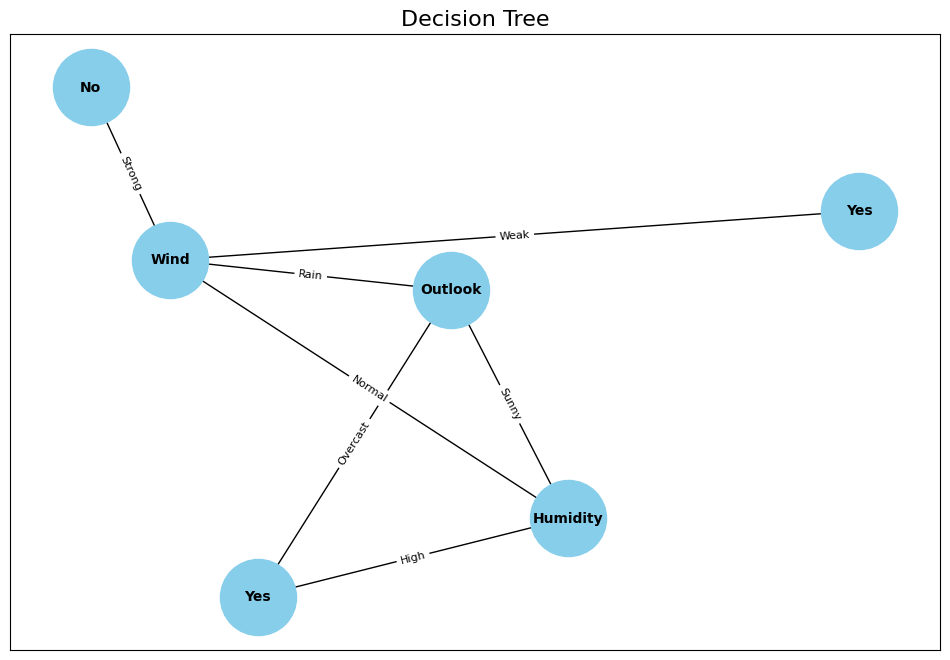

In [ ]:
def plot_tree(root, graph=None, parent_name=None, node_id=0):
    if graph is None:
        graph = nx.DiGraph()

    node_name = f"Node{node_id}"  # Unique name for each node
    graph.add_node(node_name, label=root.value)  # Add node to graph with label

    if parent_name:
        graph.add_edge(parent_name, node_name, label=root.decision)  # Add edge with decision

    # Recurse over child nodes
    for i, child in enumerate(root.childs):
        node_id += 1
        plot_tree(child, graph, node_name, node_id)  # Pass child node and increment id

    return graph

# Function to draw the decision tree using the graph
def draw_decision_tree(root):
    graph = plot_tree(root)  # Create the graph

    # Extract node labels and edge labels
    pos = nx.spring_layout(graph, seed=42,k=2)
    node_labels = nx.get_node_attributes(graph, 'label')
    edge_labels = nx.get_edge_attributes(graph, 'label')

    # Visualization with matplotlib
    plt.figure(figsize=(12, 8))

    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, node_size=3000, node_color="skyblue")

    # Draw node labels
    nx.draw_networkx_labels(graph, pos, labels=node_labels, font_size=10, font_weight="bold")

    # Draw edges and edge labels
    nx.draw_networkx_edges(graph, pos, arrows=True, edge_color="black")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

    # Show the graph
    plt.title("Decision Tree", fontsize=16)
    plt.show()

# Build the decision tree using the dataset
columns = list(range(len(X[0]) - 1))  # Exclude target column (last column)
rows = list(range(len(X)))  # All rows in the dataset
root = buildTree(X, rows, columns)

# Draw the decision tree
draw_decision_tree(root)

In [ ]:

def traverse(root, level=0):
    # Create indentation based on the level
    indent = "    " * level  # 4 spaces per level

    # Print the decision and value of the current node with indentation
    print(f"{indent}├── Decision: {root.decision}, Value: {root.value}")

    # Traverse the children, if they exist
    for i, child in enumerate(root.childs):
        if i == len(root.childs) - 1:  # Last child
            traverse(child, level + 1)
        else:
            traverse(child, level + 1)

In [ ]:
def calculate():
    rows = [i for i in range(0, 14)]
    columns = [i for i in range(0, 4)]
    root = buildTree(X, rows, columns)
    root.decision = 'Start'
    traverse(root)

In [ ]:
calculate()

├── Decision: Start, Value: Outlook
    ├── Decision: Sunny, Value: Humidity
        ├── Decision: High, Value: No
        ├── Decision: Normal, Value: Yes
    ├── Decision: Overcast, Value: Yes
    ├── Decision: Rain, Value: Wind
        ├── Decision: Weak, Value: Yes
        ├── Decision: Strong, Value: No
